<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/SI_sensibilidade_univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

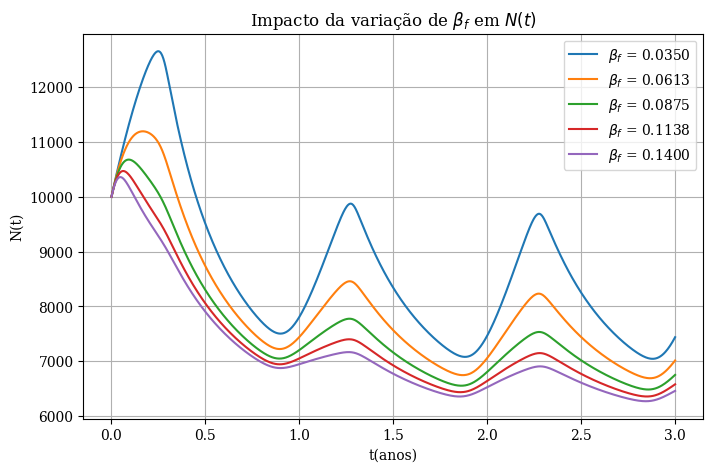

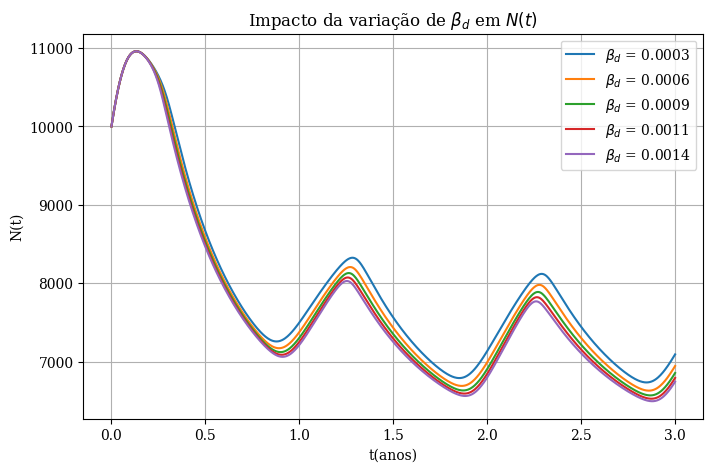

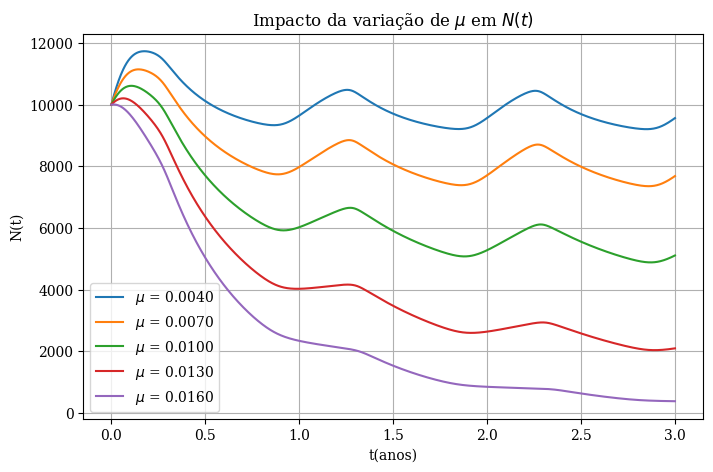

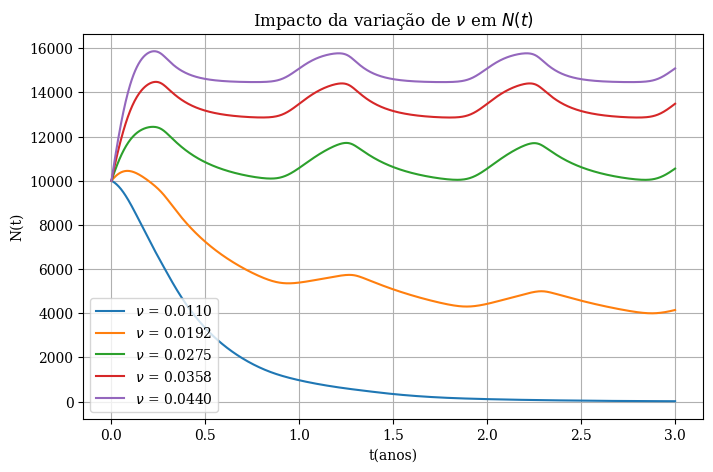

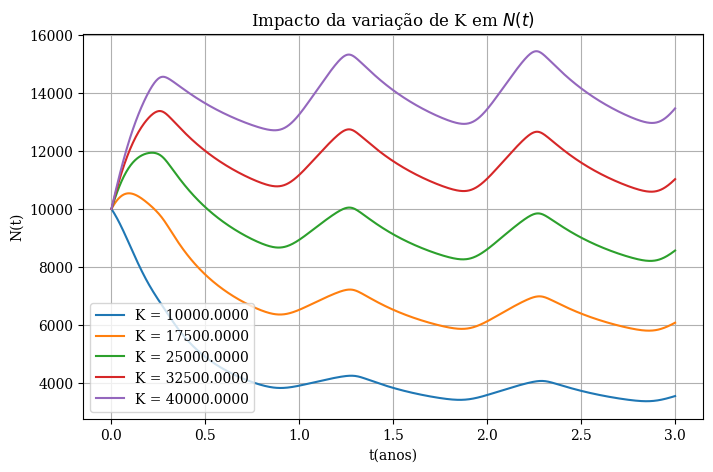

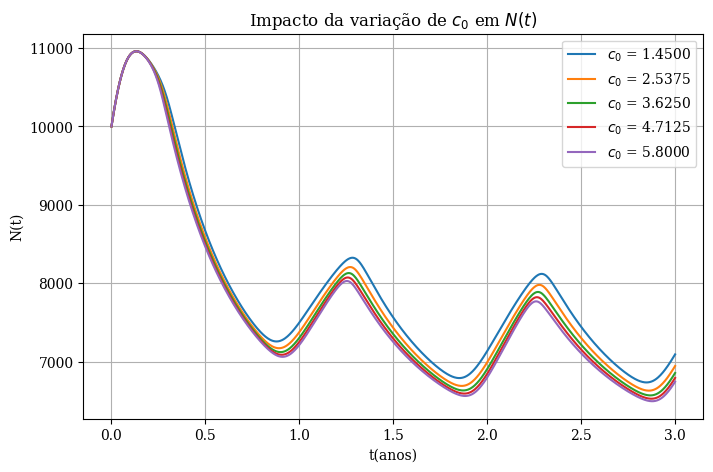

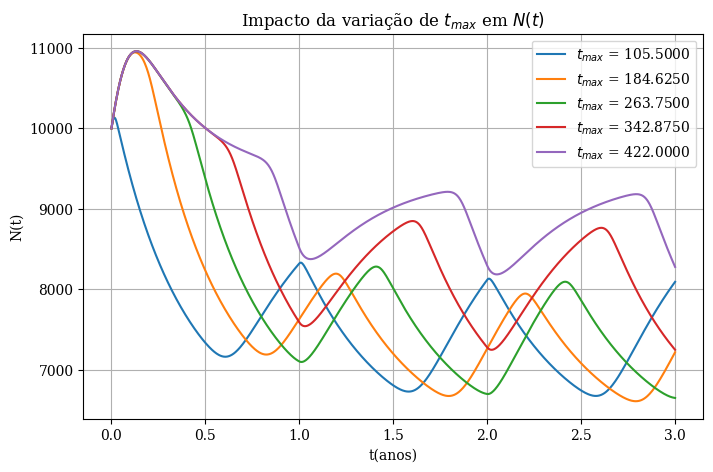

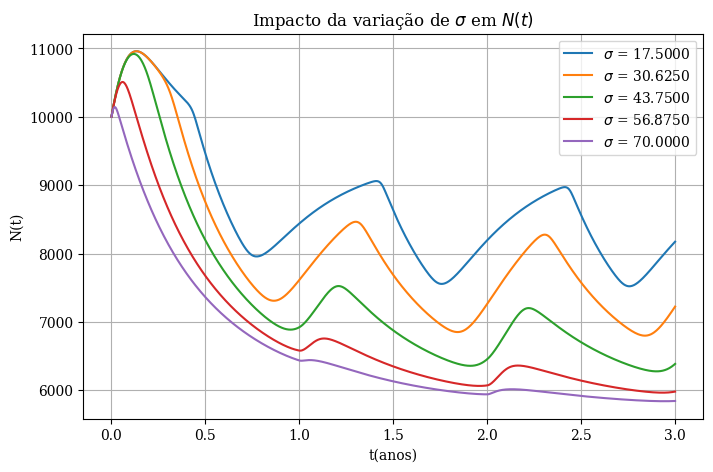

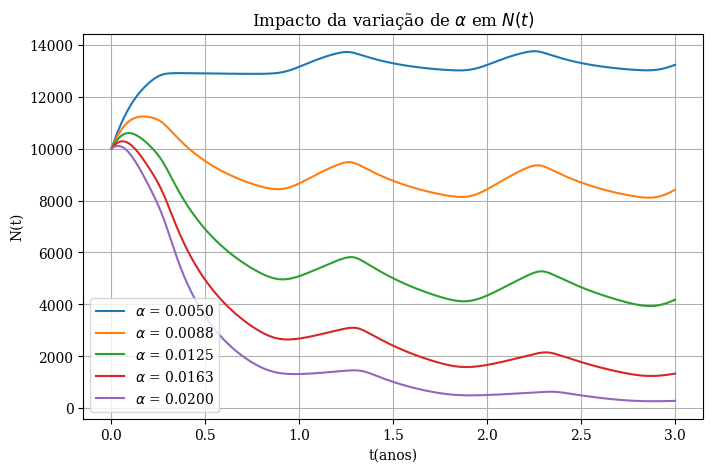

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Ativar renderização de texto em LaTeX (usetex=False usa Matplotlib interno)
plt.rc('text', usetex=False)  # Use False para não exigir LaTeX instalado
plt.rc('font', family='serif')  # Opcional, para estética

# Modelo SI com crescimento logístico, sazonalidade mista e mortalidade por doença
def si_logistic_model(t, y, beta_f, beta_d, mu, nu, K, c0, tmax, sigma, alpha):
    S, I = y
    N = max(S + I, 1e-10)  # Evita divisão por zero
    c_t = c0 * np.exp(-((t % 365 - tmax) ** 2) / (2 * sigma ** 2))
    dSdt = N * (nu - N*(nu-mu) / K) - (beta_f / N + beta_d * c_t) * S * I - mu * S
    dIdt = (beta_f / N + beta_d * c_t) * S * I - (mu + alpha) * I
    return [dSdt, dIdt]

# Parâmetros iniciais
def get_default_params():
    return {
        'beta_f': 0.07, 'beta_d': 0.0007, 'mu': 0.008, 'nu': 0.022, 'K': 20000,
        'c0': 2.9, 'tmax': 211, 'sigma': 35, 'alpha': 0.01, 'N0': 10000, 'I0_percent': 27,
        't_sim': 3
    }

def run_simulation(param_name, param_values):
    params = get_default_params()
    t_span = (0, params['t_sim'] * 365)
    t_eval = np.linspace(*t_span, 1000)
    I0 = params['N0'] * (params['I0_percent'] / 100)
    S0 = params['N0'] - I0

    plt.figure(figsize=(8, 5))
    for val in param_values:
        params[param_name] = val
        sol = solve_ivp(si_logistic_model, t_span, [S0, I0], args=(
            params['beta_f'], params['beta_d'], params['mu'], params['nu'], params['K'],
            params['c0'], params['tmax'], params['sigma'], params['alpha']),
            method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

        N_values = sol.y[0] + sol.y[1]
        # Mapeamento para símbolos gregos
        param_display = {
            'beta_f': r'$\beta_f$', 'beta_d': r'$\beta_d$', 'mu': r'$\mu$',
            'nu': r'$\nu$', 'K': 'K', 'c0': r'$c_0$', 'tmax': r'$t_{max}$',
            'sigma': r'$\sigma$', 'alpha': r'$\alpha$'
        }
        label = f"{param_display[param_name]} = {val:.4f}"
        plt.plot(sol.t / 365, N_values, label=label)

    plt.xlabel('t(anos)')
    plt.ylabel('N(t)')
    plt.title(f'Impacto da variação de {param_display[param_name]} em $N(t)$')
    plt.legend()
    plt.grid()
    plt.show()

# Parâmetros a analisar
param_list = ['beta_f', 'beta_d', 'mu', 'nu', 'K', 'c0', 'tmax', 'sigma', 'alpha']
for param in param_list:
    default_val = get_default_params()[param]
    param_values = np.linspace(0.5 * default_val, 2 * default_val, 5)  # Varia de 50% a 200%
    run_simulation(param, param_values)

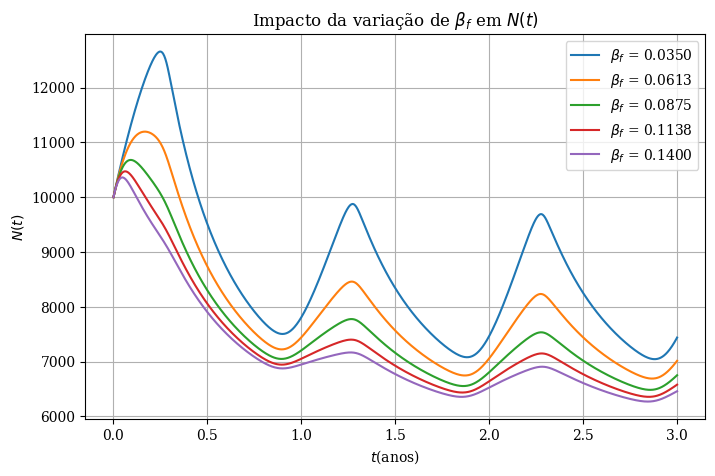

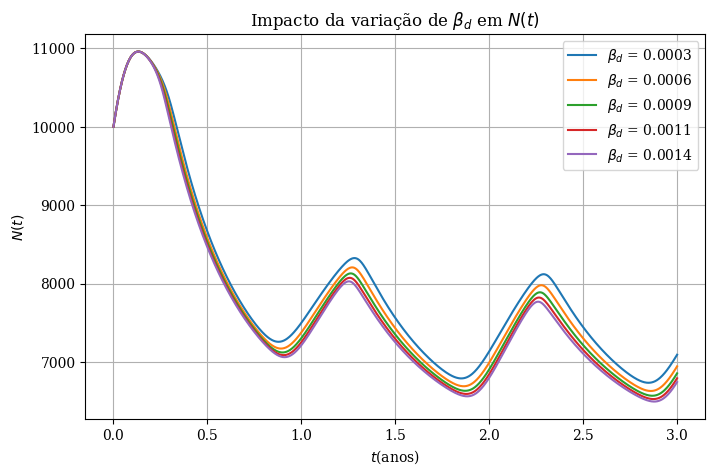

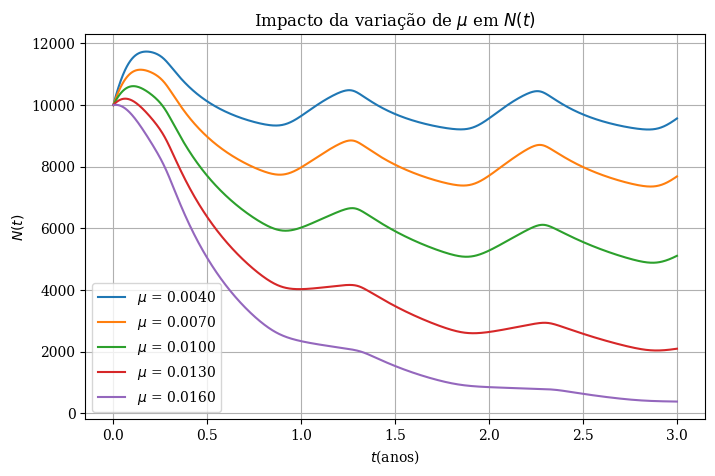

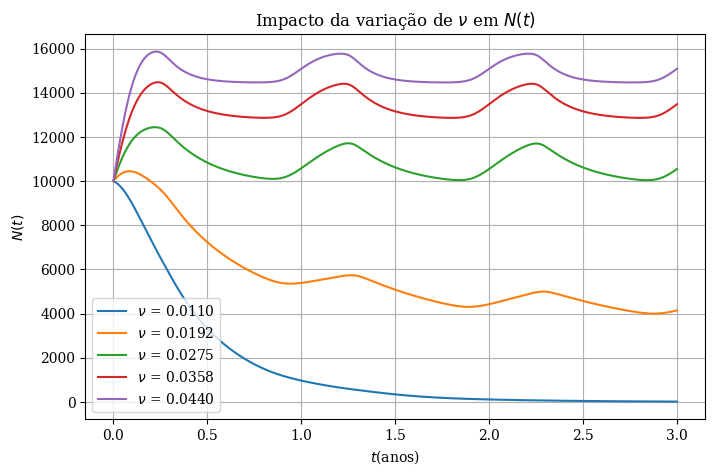

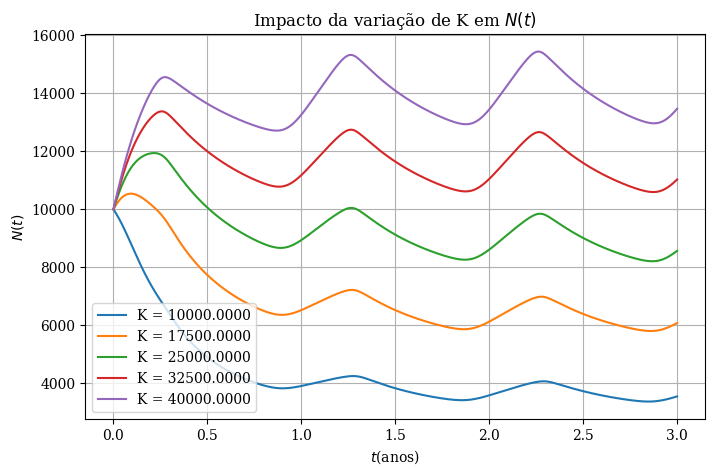

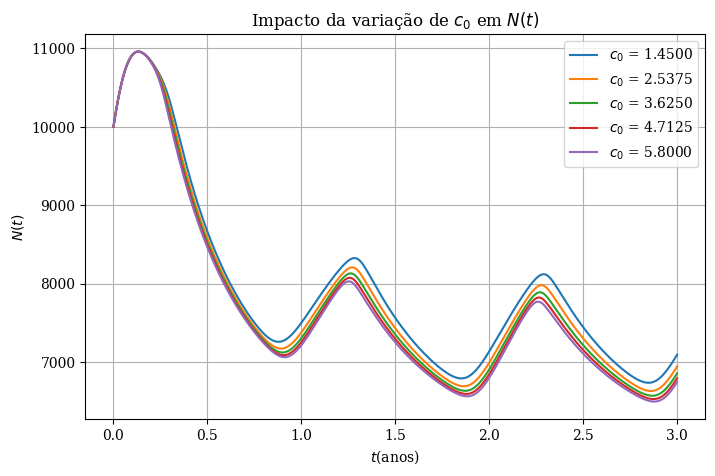

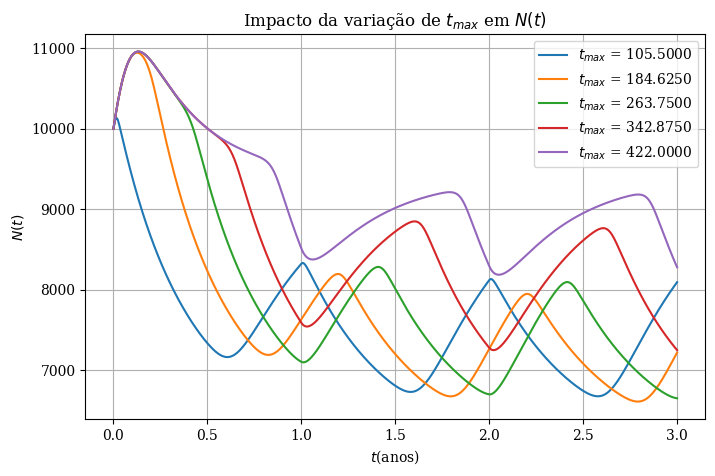

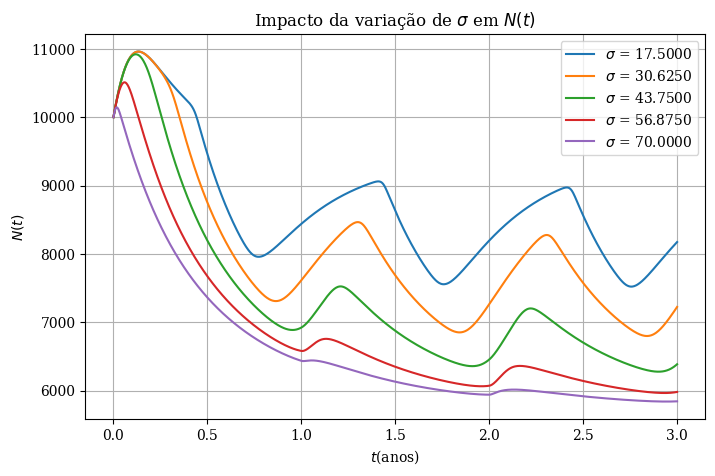

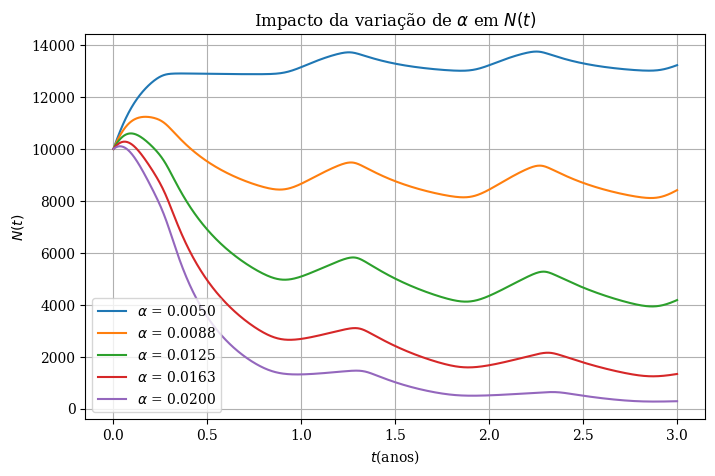

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Ativar renderização de texto em LaTeX (usetex=False usa Matplotlib interno)
plt.rc('text', usetex=False)  # Use False para não exigir LaTeX instalado
plt.rc('font', family='serif')  # Opcional, para estética

# Modelo SI com crescimento logístico, sazonalidade mista e mortalidade por doença
def si_logistic_model(t, y, beta_f, beta_d, mu, nu, K, c0, tmax, sigma, alpha):
    S, I = y
    N = max(S + I, 1e-10)  # Evita divisão por zero
    c_t = c0 * np.exp(-((t % 365 - tmax) ** 2) / (2 * sigma ** 2))
    dSdt = N * (nu - N*(nu-mu) / K) - (beta_f / N + beta_d * c_t) * S * I - mu * S
    dIdt = (beta_f / N + beta_d * c_t) * S * I - (mu + alpha) * I
    return [dSdt, dIdt]

# Parâmetros iniciais
def get_default_params():
    return {
        'beta_f': 0.07, 'beta_d': 0.0007, 'mu': 0.008, 'nu': 0.022, 'K': 20000,
        'c0': 2.9, 'tmax': 211, 'sigma': 35, 'alpha': 0.01, 'N0': 10000, 'I0_percent': 27,
        't_sim': 3
    }

def run_simulation(param_name, param_values):
    params = get_default_params()
    t_span = (0, params['t_sim'] * 365)
    t_eval = np.linspace(*t_span, 1000)
    I0 = params['N0'] * (params['I0_percent'] / 100)
    S0 = params['N0'] - I0

    plt.figure(figsize=(8, 5))
    for val in param_values:
        params[param_name] = val
        sol = solve_ivp(si_logistic_model, t_span, [S0, I0], args=(
            params['beta_f'], params['beta_d'], params['mu'], params['nu'], params['K'],
            params['c0'], params['tmax'], params['sigma'], params['alpha']),
            method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

        N_values = sol.y[0] + sol.y[1]
        # Mapeamento para símbolos gregos
        param_display = {
            'beta_f': r'$\beta_f$', 'beta_d': r'$\beta_d$', 'mu': r'$\mu$',
            'nu': r'$\nu$', 'K': 'K', 'c0': r'$c_0$', 'tmax': r'$t_{max}$',
            'sigma': r'$\sigma$', 'alpha': r'$\alpha$'
        }
        label = f"{param_display[param_name]} = {val:.4f}"
        plt.plot(sol.t / 365, N_values, label=label)

    plt.xlabel('$t$(anos)')
    plt.ylabel('$N(t)$')
    plt.title(f'Impacto da variação de {param_display[param_name]} em $N(t)$')
    plt.legend()
    plt.grid()

    # Salvar o gráfico como PNG com alta resolução
    filename = f'sensitivity_{param_name}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()  # Fecha a figura para liberar memória

# Parâmetros a analisar
param_list = ['beta_f', 'beta_d', 'mu', 'nu', 'K', 'c0', 'tmax', 'sigma', 'alpha']
for param in param_list:
    default_val = get_default_params()[param]
    param_values = np.linspace(0.5 * default_val, 2 * default_val, 5)  # Varia de 50% a 200%
    run_simulation(param, param_values)